In [1]:
import os, sys
import numpy as np
import EMdata
import torch
import itertools
import random, math
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
#GPU or CPU
if torch.cuda.is_available():  
    dev = "cuda:0" 
else: 
    dev = "cpu"  
device = torch.device(dev) 

In [508]:
#data path
file_path0='F:/script/class2vec/real_star_file/10340_case2_600_sampling2.star'
file_path1='F:/script/class2vec/real_star_file/10340_case2_600_sampling05.star'
datatype0=0  #0 is relion 3.1, 1 is relion 3, 2 is cryosparc
datatype1=0
block_size=64

file_name0=os.path.splitext(os.path.basename(file_path0))[0]

file_name1=os.path.splitext(os.path.basename(file_path1))[0]
output_path=os.path.dirname(file_path0)+'/'+'compare'
print(output_path)
if os.path.isdir(output_path) is False:
    os.mkdir(output_path)

F:/script/class2vec/real_star_file/compare


In [509]:
if datatype0<2:
    file_info0=EMdata.read_relion(file_path0)
    if datatype0==0:
        #read data (relion3.1)
        dataset0=file_info0.getRdata_31()
        optics0=file_info0.extractoptic()
    else:
        #read relion 3.0
        dataset0=file_info0.getRdata()
    metadata0=dataset0[0]
    print(metadata0)
    data0=dataset0[1]
    print(data0[0])
    corpus_information0=EMdata.process_helical(dataset0).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset0).extract_helical()
corpus_dic0=corpus_information0[0]
corpus0=list(corpus_dic0.values())
corpus_backup0=corpus0[:]

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLengthAngst', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnOpticsGroup', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnGroupNumber', '_rlnAngleRot', '_rlnAngleTilt', '_rlnAnglePsi', '_rlnOriginXAngst', '_rlnOriginYAngst', '_rlnClassNumber', '_rlnNormCorrection', '_rlnLogLikeliContribution', '_rlnMaxValueProbDistribution', '_rlnNrOfSignificantSamples']
['3534.337190', '993.060709', '1', '90.000000', '116.458355', '169.199993', '0.500000', '000001@Extract/job191/Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrcs', 'Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrc', '1', '4.172093', '0.180994', '16202.446289', '16096.935547', '54.328850', '0.000000', '1.000000', '0.000000', '1', '0.000000

In [510]:
if datatype1<2:
    file_info1=EMdata.read_relion(file_path1)
    if datatype1==0:
        #read data (relion3.1)
        dataset1=file_info1.getRdata_31()
        optics1=file_info1.extractoptic()
    else:
        #read relion 3.0
        dataset1=file_info1.getRdata()
    metadata1=dataset1[0]
    print(metadata1)
    data1=dataset1[1]
    print(data1[0])
    corpus_information1=EMdata.process_helical(dataset1).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset).extract_helical()
corpus_dic1=corpus_information1[0]
corpus1=list(corpus_dic1.values())
corpus_backup1=corpus1[:]

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLengthAngst', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnOpticsGroup', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnGroupNumber', '_rlnAngleRot', '_rlnAngleTilt', '_rlnAnglePsi', '_rlnOriginXAngst', '_rlnOriginYAngst', '_rlnClassNumber', '_rlnNormCorrection', '_rlnLogLikeliContribution', '_rlnMaxValueProbDistribution', '_rlnNrOfSignificantSamples']
['3534.337190', '993.060709', '1', '90.000000', '116.458355', '169.199993', '0.500000', '000001@Extract/job191/Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrcs', 'Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrc', '1', '4.172093', '0.180994', '16202.446289', '16096.935547', '54.328850', '0.000000', '1.000000', '0.000000', '1', '0.000000

In [511]:
list0=[]
for i in range(len(data0)):
    list0.append(data0[i][2])
vocabulary0 = list(Counter(list0))

list1=[]
for i in range(len(data1)):
    list1.append(data1[i][5])
vocabulary1 = list(Counter(list1))

In [512]:
print(Counter(list1))

Counter({'338.399986': 5126, '422.999983': 4966, '84.599997': 4965, '0.000000': 4952, '169.199993': 4937, '253.799990': 4915, '507.599979': 4669, '592.199976': 4260, '676.799973': 3827, '761.399969': 3356, '42.299998': 3158, '296.099988': 3157, '126.899995': 3156, '380.699985': 3123, '211.499991': 3101, '465.299981': 2904, '845.999966': 2894, '549.899978': 2621, '930.599962': 2497, '634.499974': 2321, '1015.199959': 2128, '719.099971': 2032, '366.599985': 1966, '394.799984': 1954, '451.199982': 1932, '310.199987': 1929, '479.399981': 1910, '281.999989': 1869, '535.799978': 1855, '563.999977': 1811, '28.199999': 1808, '56.399998': 1805, '112.799995': 1802, '225.599991': 1796, '140.999994': 1795, '197.399992': 1794, '1099.799955': 1793, '620.399975': 1730, '803.699967': 1719, '648.599974': 1687, '704.999971': 1584, '733.199970': 1527, '1184.399952': 1503, '888.299964': 1452, '789.599968': 1425, '817.799967': 1374, '1268.999949': 1264, '874.199965': 1261, '972.899961': 1212, '902.399963':

In [513]:
#import relion
corpus_ignore_0=[]
for i in range(len(corpus0)):
    corpus_row=[]
    count=1
    lst=corpus0[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore_0.append(corpus_row)

In [514]:
vocabulary0 = set(itertools.chain.from_iterable(corpus_ignore_0))
list0=list(itertools.chain.from_iterable(corpus_ignore_0))
vocabulary_size0 = len(vocabulary0)
print(vocabulary_size0,len(corpus_ignore_0))

54 5825


In [515]:
# import cryosparc
corpus_ignore_1=[]
for i in range(len(corpus1)):
    corpus_row=[]
    count=1
    lst=corpus1[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore_1.append(corpus_row)

In [516]:
vocabulary1 = set(itertools.chain.from_iterable(corpus_ignore_1))
list1=np.array(list(itertools.chain.from_iterable(corpus_ignore_1)))
vocabulary_size1 = len(vocabulary1)
print(vocabulary_size1,len(corpus_ignore_1))

55 5825


In [517]:
print(len(list0)-len(list1))

0


In [518]:
import pandas as pd
dataframe=pd.DataFrame({'data1': list0,'data2':list1})
matrix=pd.DataFrame(0,index=list(vocabulary1),columns=list(vocabulary0),dtype='float')
for i in list(vocabulary0):
    normalizer=float(len(dataframe[dataframe['data1']==i]))
    for j in list(vocabulary1):
        matrix[i][j]=float(len(dataframe[(dataframe['data1']==i)&(dataframe['data2']==j)]))*100/normalizer

In [519]:
dataframe[(dataframe['data1']==list(vocabulary0)[0])&(dataframe['data2']==list(vocabulary1)[0])]

,data1,data2
87,13,13
111,13,13
112,13,13
683,13,13
1837,13,13
...,...,...
149274,13,13
149621,13,13
149645,13,13
149646,13,13


In [520]:
matrix

,13,16,30,48,9,53,59,2,34,28,...,19,45,11,20,60,56,17,40,38,29
13,28.072153,0.036738,0.100435,0.676407,0.113379,0.692713,6.503067,0.000000,1.756312,0.071412,...,0.893132,0.451354,0.000000,4.565336,1.778017,0.078709,7.366638,0.652742,0.360301,2.177684
55,2.677565,0.587803,0.368262,0.622294,0.264550,5.181491,0.797546,1.041667,0.905598,0.214235,...,0.585156,0.752257,0.124844,8.638600,1.427802,0.275482,7.084392,1.436031,1.670488,12.526498
16,0.028185,0.698016,1.071309,0.135281,0.680272,0.000000,0.000000,1.388889,0.000000,2.047132,...,0.061595,0.125376,0.000000,0.000000,0.134698,0.354191,0.000000,0.783290,0.065509,0.019272
30,0.140924,0.881705,0.133914,0.000000,2.569917,0.554170,0.153374,0.000000,0.000000,0.071412,...,0.153988,0.025075,0.873908,0.000000,0.026940,10.192837,0.197573,0.913838,9.891910,0.173444
48,0.591883,0.404115,1.171744,6.791126,0.226757,0.387919,10.644172,1.041667,3.183315,3.070697,...,3.757314,35.406219,0.124844,1.202843,6.034483,0.196773,0.818515,1.174935,0.753357,0.655232
9,1.211950,0.367377,0.736525,0.459957,0.680272,11.471322,1.809816,0.347222,0.631175,0.261842,...,1.077918,0.576730,0.249688,14.789502,1.912716,0.157418,4.600621,0.261097,2.161808,1.657352
53,0.056370,3.600294,3.180449,0.216450,7.105064,0.581879,0.061350,0.000000,0.137212,0.285646,...,0.369572,0.025075,0.000000,0.082012,0.646552,4.447068,0.000000,0.522193,1.703243,0.211987
59,0.056370,0.440852,1.439571,0.054113,2.758881,0.083126,0.429448,0.000000,0.027442,0.666508,...,0.092393,0.175527,0.000000,0.027337,0.296336,0.944510,0.141123,0.391645,0.524075,0.057815
34,0.084555,15.393093,0.569133,0.000000,4.610733,0.387919,0.092025,0.000000,0.000000,0.333254,...,0.030798,0.175527,0.124844,0.082012,0.080819,5.116096,0.197573,1.305483,4.913200,0.077086
52,6.313416,0.183688,0.033478,0.027056,0.188964,1.136049,0.306748,0.000000,0.246981,0.000000,...,0.985525,0.025075,1.373283,1.394204,0.134698,0.157418,1.580581,0.783290,6.976744,1.329736


In [521]:
data = matrix.loc[:, matrix.max().sort_values().index]
data = data.loc[data.max(axis=1).sort_values().index, :]

In [522]:
# heat map function from matplot
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [523]:
data

,38,43,21,12,8,1,39,37,18,59,...,57,4,27,23,3,10,31,47,11,2
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023895,0.000000,0.065020,0.000000,...,0.038432,0.000000,0.000000,0.000000,1.773836,0.000000,0.000000,0.000000,1.123596,0.000000
17,0.000000,1.559978,0.031124,0.041649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.162338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.498127,0.000000
8,0.720603,1.990317,0.871460,0.249896,4.447115,7.233627,4.396655,2.151940,0.000000,3.435583,...,0.115296,0.389610,0.082305,5.509642,0.665188,5.045625,0.000000,0.000000,0.000000,0.347222
1,8.843760,1.613771,3.267974,2.540608,0.961538,2.297165,1.027479,6.129769,0.650195,1.042945,...,1.076095,2.629870,0.082305,1.652893,0.000000,0.295223,0.000000,1.273885,0.000000,0.000000
29,2.161808,0.806885,2.272020,0.166597,3.966346,2.199413,9.988053,4.238670,0.065020,2.177914,...,0.000000,0.259740,0.164609,1.790634,1.552106,1.019860,0.000000,0.000000,0.000000,0.000000
30,9.891910,10.220549,0.591348,10.412328,0.060096,0.293255,0.119474,0.358657,8.517555,0.153374,...,0.538048,0.064935,0.246914,0.550964,0.221729,0.000000,0.000000,0.000000,0.873908,0.000000
40,0.949885,0.430339,0.902583,0.291545,3.485577,1.808407,6.642772,8.835996,0.390117,0.460123,...,0.115296,0.064935,0.000000,0.964187,0.000000,0.295223,0.000000,0.636943,0.000000,0.000000
53,1.703243,3.173749,0.840336,10.412328,0.270433,1.612903,0.023895,0.815129,1.690507,0.061350,...,4.765565,0.746753,0.164609,0.275482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55,1.670488,0.699301,3.081232,0.291545,12.950721,2.688172,3.751493,1.630258,0.195059,0.797546,...,0.345888,0.422078,0.329218,2.341598,1.330377,1.154053,0.000000,3.184713,0.124844,1.041667
43,0.622339,0.537924,0.280112,0.208247,0.150240,0.244379,0.238949,0.489077,1.495449,0.122699,...,0.192160,0.292208,0.000000,0.137741,0.443459,0.161031,0.000000,1.910828,7.865169,0.000000


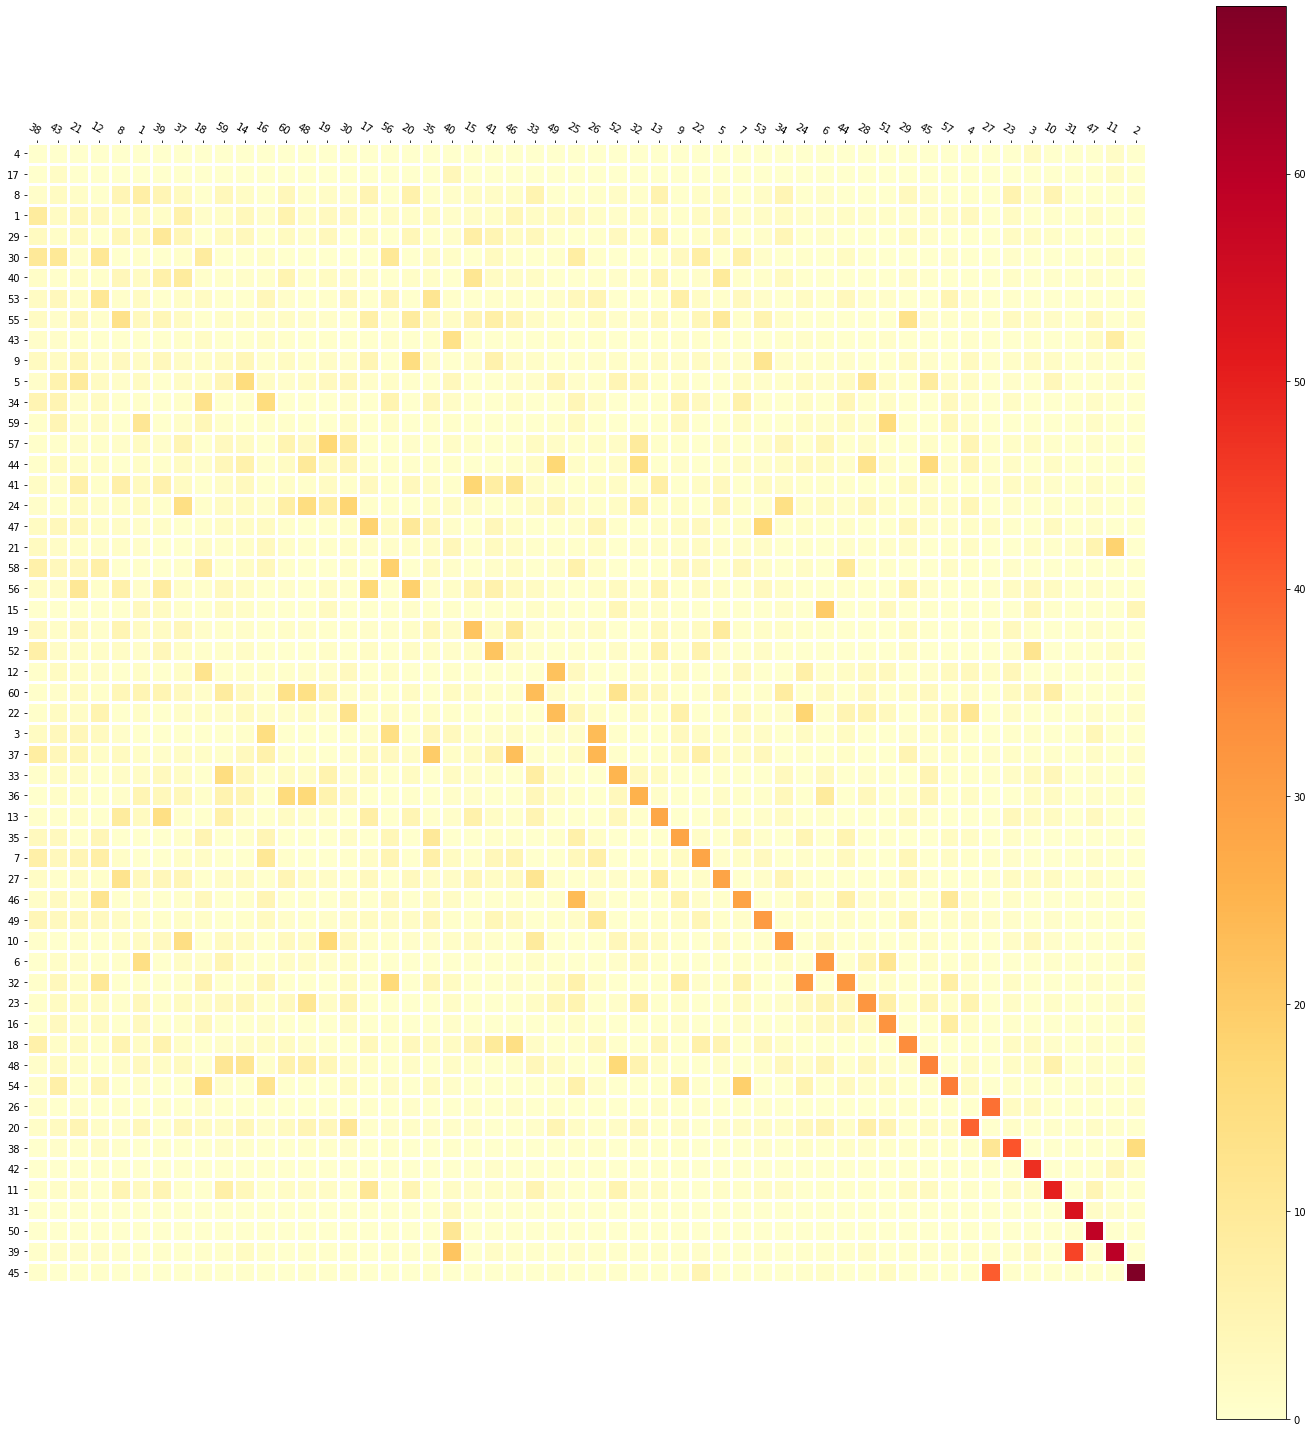

In [524]:
fig, ax = plt.subplots(figsize = (20, 20))

im, cbar = heatmap(data,list(data.index), list(data.head()), ax=ax,cmap="YlOrRd", cbarlabel="")

fig.tight_layout()
plt.savefig(output_path+'/'+file_name0+'__'+file_name1+'__sort'+".png",bbox_inches='tight', pad_inches=0.01)
plt.show()

In [581]:
#if there is only one element, substitute all the element with the that one, 
# if there are multiple element, substitute by the first tuple if the pairs are not in the list.
suball=[]
subidx=[]
for i in list(vocabulary0):
    lst=matrix[i]
    if lst.max()>50: 
        subidx.append(i)
        sublist=[]
        sublist.append((i,lst.idxmax()))
        non_change_classes=list(matrix.index[(lst>30)&(lst<=50)])
        for j in non_change_classes:
            sublist.append((i,j))
        suball.append(sublist)
    elif lst.max()>30:
        subidx.append(i)
        sublist=[]
        sublist.append((i,lst.idxmax()))
        non_change_classes=list(data.index[(lst>15)&(lst<=30)])
        for j in non_change_classes:
            sublist.append((i,j))
        suball.append(sublist)
    elif lst.max()>15:
        subidx.append(i)
        sublist=[]
        sublist.append((i,lst.idxmax()))
        non_change_classes=list(data.index[(lst>5)&(lst<=10)])
        for j in non_change_classes:
            sublist.append((i,j))
        suball.append(sublist)
    else:
        continue

In [582]:
subidx
print(suball)

[[('13', '13'), ('13', '43'), ('13', '15'), ('13', '37'), ('13', '33'), ('13', '39')], [('16', '34'), ('16', '59')], [('30', '24'), ('30', '27')], [('48', '36'), ('48', '29'), ('48', '3')], [('9', '35'), ('9', '40'), ('9', '36'), ('9', '10'), ('9', '6'), ('9', '16')], [('53', '49'), ('53', '46')], [('2', '45')], [('34', '10')], [('28', '23')], [('51', '16'), ('51', '53')], [('52', '33'), ('52', '26')], [('23', '38')], [('5', '27'), ('5', '17'), ('5', '56'), ('5', '48'), ('5', '11')], [('24', '32'), ('24', '16')], [('26', '37'), ('26', '22')], [('31', '31'), ('31', '39')], [('33', '60'), ('33', '4'), ('33', '21'), ('33', '33'), ('33', '32')], [('49', '22')], [('41', '52'), ('41', '17'), ('41', '30'), ('41', '59'), ('41', '56'), ('41', '15'), ('41', '42')], [('6', '6'), ('6', '23')], [('35', '37'), ('35', '52'), ('35', '22')], [('25', '46'), ('25', '1'), ('25', '5'), ('25', '52'), ('25', '60'), ('25', '10'), ('25', '6')], [('7', '46'), ('7', '1'), ('7', '55'), ('7', '6')], [('44', '32')]

In [583]:
corpus_new=[]
change=0
for i in range(len(corpus_ignore_0)):
    lst0=corpus_ignore_0[i]
    lst1=corpus_ignore_1[i]
    corpus_tmp=[]
    for j in range(len(lst0)):
        if lst0[j] in subidx:
            lst=suball[subidx.index(lst0[j])]
            if (lst0[j],lst1[j]) in lst:
                corpus_tmp.append(lst1[j])
            else:
                corpus_tmp.append(lst[0][-1])
                change+=1
        else:
            corpus_tmp.append(lst1[j])
    corpus_new.append(corpus_tmp)
print(change)

87160


In [584]:
print(corpus_ignore_1[0],corpus_new[0])

['6', '57', '36', '36', '29', '27', '13', '27', '27', '27', '19', '19', '19', '19', '19', '19', '37', '37', '37', '37', '37', '37', '3', '3', '3', '34', '34', '5', '3', '3', '3', '58'] ['6', '57', '36', '36', '29', '27', '13', '27', '27', '27', '19', '19', '19', '19', '27', '37', '37', '37', '37', '37', '37', '37', '37', '34', '3', '34', '34', '5', '3', '58', '32', '32']


In [585]:
vocabulary = set(itertools.chain.from_iterable(corpus_new))
vocabulary_size = len(vocabulary)
print(vocabulary_size,len(corpus_new))

55 5825


In [586]:
word_to_index = {w: idx for (idx, w) in enumerate(vocabulary)}
index_to_word = {idx: w for (idx, w) in enumerate(vocabulary)}

In [587]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer
if os.path.isdir(output_path+"/corpus") is False:
    os.mkdir(output_path+"/corpus")
paths = [str(x) for x in Path(output_path+"/corpus/").glob("**/*.txt")]

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=vocabulary_size, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
if os.path.isdir(output_path+"/tokens") is False:
    os.mkdir(output_path+"/tokens")
if os.path.isdir("./tokens") is False:
    os.mkdir("./tokens")
tokenizer.save_model(output_path+"/tokens")
tokenizer.save_model("./tokens")

['./tokens\\vocab.json', './tokens\\merges.txt']

In [588]:
import json

with open(output_path+'/tokens/vocab.json') as f:
    decode = json.load(f)
encode={value:key for (key, value) in decode.items()}
corpus_code=[]
for i in range(len(corpus_new)):
    lst=corpus_new[i]
    corpus_row=[]
    for j in range(len(lst)):
        corpus_row.append(encode[word_to_index[lst[j]]+5])
    corpus_code.append(corpus_row)
with open(output_path+"/corpus/helical.txt","w") as f:
    for i in range(len(corpus_code)):
        lst=corpus_code[i]
        for j in range(len(lst)):
            if j==len(lst)-1:
                f.write(lst[j]+'\n')
            else:
                f.write(lst[j])

In [589]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained(output_path+"/tokens", max_len=514)
#tokenizer.encode(encode[word_to_index['0']+5])

from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=50_000,
    max_position_embeddings=128,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)

In [590]:
%%time
from transformers import LineByLineTextDataset

data_import = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=output_path+"/corpus/helical.txt",
    block_size=block_size,
)

Wall time: 104 ms


In [591]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [592]:
from transformers import Trainer, TrainingArguments

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    train_dataset=data_import,
    prediction_loss_only=True,
)

D:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer.py:247: FutureWarning: Passing `prediction_loss_only` as a keyword argument is deprecated and won't be possible in a future version. Use `args.prediction_loss_only` instead.
  FutureWarning,


In [593]:
trainer.train()

{'loss': 4.01656201171875, 'learning_rate': 3.856881572930956e-05, 'epoch': 0.6858710562414266, 'step': 500}


D:\ProgramData\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


{'loss': 2.5954716796875, 'learning_rate': 2.7137631458619112e-05, 'epoch': 1.3717421124828533, 'step': 1000}



{'loss': 2.25319970703125, 'learning_rate': 1.570644718792867e-05, 'epoch': 2.05761316872428, 'step': 1500}
{'loss': 2.05271875, 'learning_rate': 4.275262917238227e-06, 'epoch': 2.7434842249657065, 'step': 2000}




TrainOutput(global_step=2187, training_loss=2.6655099290552124)

In [594]:
trainer.save_model(output_path+"/tokens/")
trainer.save_model("./tokens/")

In [595]:
from transformers import pipeline

feature_extraction = pipeline(
    'feature-extraction',model="./tokens",tokenizer="./tokens")

In [596]:
def cut_corpus(corpus,cut_length):
    new_corpus=[]
    cut_length=cut_length
    print(len(corpus))
    for i in range(len(corpus)):
        lst=corpus[i]
        n=len(lst)
        if n<=cut_length:
            new_corpus.append(lst)
            continue
        if n%cut_length==0:
            cut_amount=int(n/cut_length)
        else:
            cut_amount=int((n-n%cut_length)/cut_length)+1
        for j in range(cut_amount-1):
            new_corpus.append(lst[j*cut_length:(j+1)*cut_length])
        new_corpus.append(lst[(cut_amount-1)*cut_length:])
    print(len(new_corpus))
    return new_corpus
corpus_code_cut=cut_corpus(corpus_code,block_size)

5825
6010


In [597]:
filament_embeddings=[]
for i in range(len(corpus_code_cut)):
    if i%200==0:
        print(i)
    lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[i])))[0])
    filament_embeddings.append(lst)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000


In [598]:
print(''.join(corpus_code_cut[3938][12:-5]))
lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[3938])[12:23])))
print(len(corpus_code_cut[3938][11:-5]))

...C;--FHHHHHQQ?!
18


In [599]:
print(len(lst))

13


In [600]:
len(''.join(corpus_code_cut[77]))

58

In [601]:
import umap
import sklearn
from sklearn.cluster import KMeans,SpectralClustering,MeanShift, estimate_bandwidth,DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal 
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

In [602]:
filament_embeddings=np.array(filament_embeddings)
mask_1 = np.isfinite(filament_embeddings).all(axis=1)

In [603]:
filament_embeddings[0]

array([ 0.05184226, -0.3890309 , -1.13112676,  0.43259275, -0.1727045 ,
        0.50063181, -1.99962902,  2.07036662, -1.45566845,  1.17897427,
       -1.06278348, -1.03431189,  0.71069074,  1.56099975, -1.99656677,
       -1.05559027,  1.12689769,  2.07817578, -1.36113322, -0.18156941,
        0.99221247,  1.15227973, -0.97132874,  0.55552346, -0.63753086,
       -0.13677208,  1.03336871,  0.20584537,  0.75023192,  1.61284053,
       -0.34751725, -2.91312194,  0.74928606,  1.14061904,  1.7101177 ,
        0.0470266 ,  1.75850701,  0.14850965, -0.19863243, -0.08093228,
       -0.72277516, -2.78273106,  0.96416527, -0.35827607,  1.05680692,
       -1.46448994,  0.42271653, -0.10219745,  0.90494633, -0.96121007,
       -0.35178599, -0.89868689,  0.59486061, -0.62796009,  1.18195522,
       -0.03684276, -0.50646216,  2.7534101 , -1.50237048,  1.86531425,
        1.30065989, -2.72964311,  0.51506966, -2.22525907,  0.47410998,
        0.16276249,  0.53384924,  1.05021882,  0.33077997, -0.53

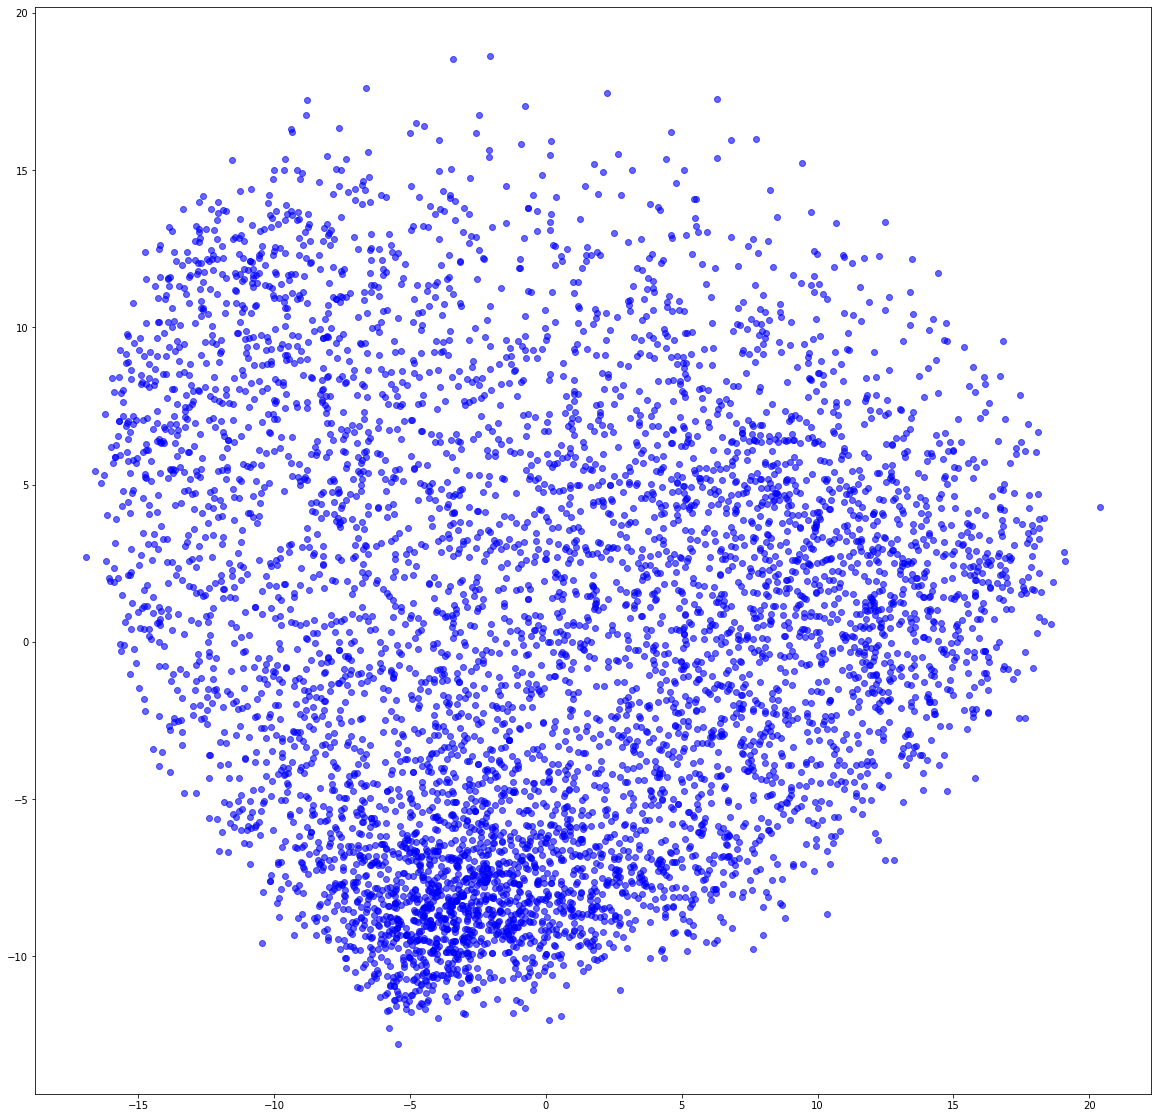

In [605]:
pca_sum = PCA(n_components=2).fit_transform(filament_embeddings)
#cluster_pca = KMeans(n_clusters=3).fit_predict(pca_sum[0:len(corpus)])
pca_sum_hD = PCA(n_components=30).fit_transform(filament_embeddings)

plt.figure(figsize = (20, 20))
plt.scatter(pca_sum[:,0], pca_sum[:,1],alpha=0.6,color='blue')
plt.savefig(output_path+'/'+'mix'+"_bert_pca.png",bbox_inches='tight', pad_inches=0.01)
plt.show()


In [606]:
%%time
n_neighbors=15
min_dist=0.1
#umap_ND=umap.UMAP(n_neighbors=200,min_dist=0.4,n_components=100).fit_transform(filament_embeddings)
reducer = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist)
umap_2D = reducer.fit_transform(filament_embeddings)
umap_ND=umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,n_components=100).fit_transform(filament_embeddings)
print('finish umap')

finish umap
Wall time: 14.7 s


In [607]:
with open(output_path+'/'+'umap_3D_bert.npy', 'wb') as f:
    np.save(f, umap_ND)

In [608]:
filament_cluster_number=2
umap_predict=SpectralClustering(n_clusters=filament_cluster_number).fit_predict(umap_ND)
#umap_predict=DBSCAN(eps=0.41, min_samples=100).fit_predict(umap_2D)+1
#filament_cluster_number=len(np.unique(umap_predict))

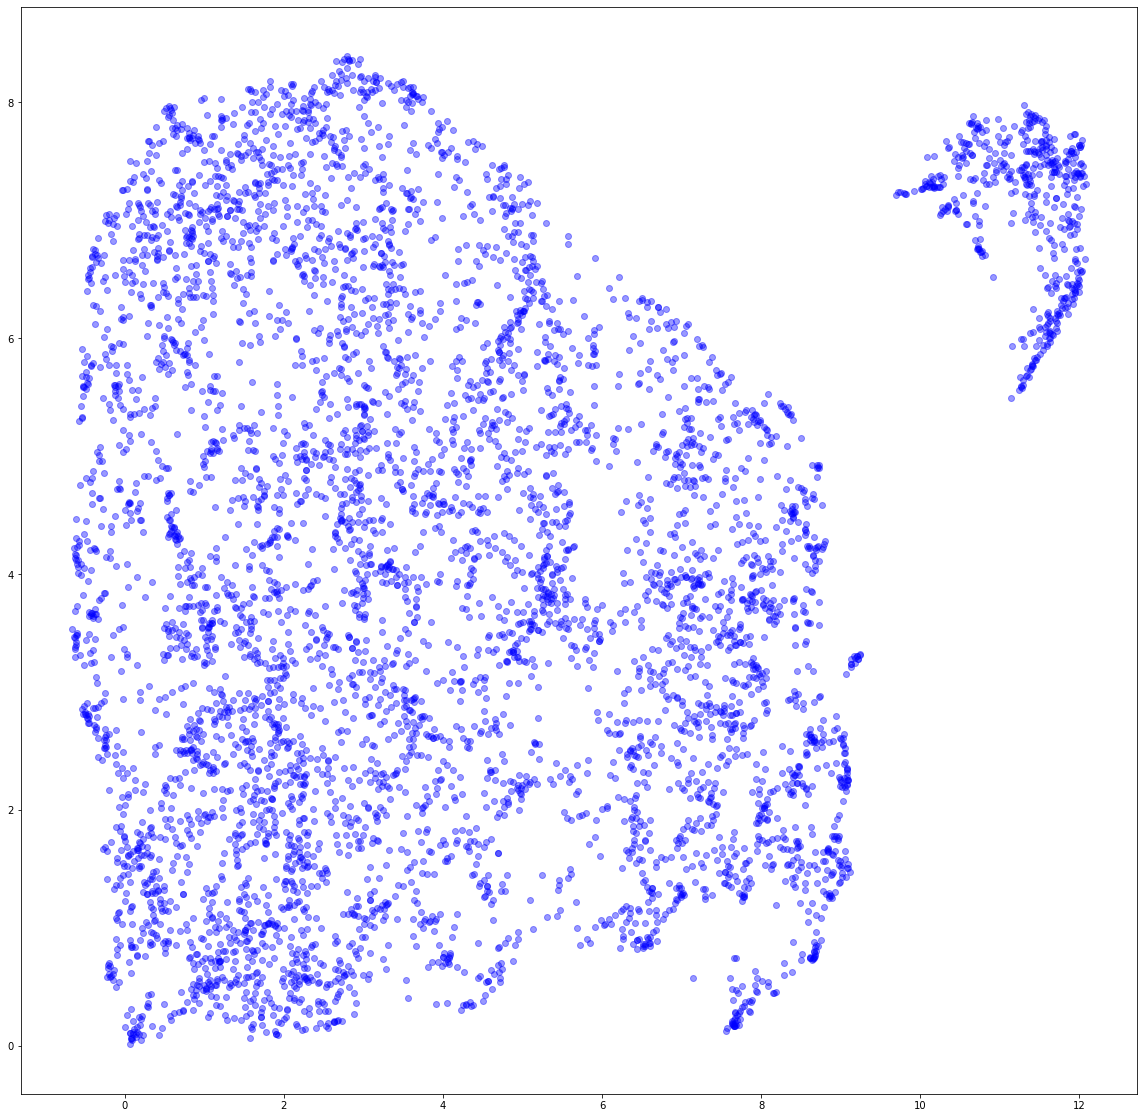

In [609]:
plt.figure(figsize = (20, 20))

#for i in range(filament_cluster_number):
#    locals()['labels'+str(i)]=mpatches.Patch(color=plt.cm.tab20((i)/filament_cluster_number), 
#                                             label=str(i)+' : '+str(np.count_nonzero(umap_predict==i)))
#plt.legend(handles=[eval('labels'+str(i)) for i in range(filament_cluster_number)])
#plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.6,c=plt.cm.tab20((umap_predict)/filament_cluster_number))
plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.4,c='blue')
#plt.xlim((-20,20))
#plt.ylim((-10,20))
plt.savefig(output_path+'/'+'mix'+"_bert_umap_blue.png",bbox_inches='tight', pad_inches=0.01)
#c=plt.cm.tab20((umap_predict+1)/filament_cluster_number)

In [610]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    cluster_nameID='clusterID'+str(i)
    locals()[cluster_name]=[]
    locals()[cluster_nameID]=[]
data_line=0
cluster_choice=umap_predict
positive_label=[]
for i in range(len(corpus_code_cut)):
    lst=corpus_code_cut[i]
    cluster_number=cluster_choice[i]
    cluster_name='cluster'+str(cluster_number)
    cluster_nameID='clusterID'+str(cluster_number)
    for j in range(len(lst)):
        locals()[cluster_name].append(data0[data_line])
        locals()[cluster_nameID].append(data0[data_line][7][18:21])
        data_line+=1
    positive_label.append(locals()[cluster_nameID][-1])
positive_label=np.array(positive_label)
labels=list(np.unique(positive_label))
positive_label_new=np.array([float(labels.index(x)) for x in positive_label])
labels_name=['data0','data1'] # define the type of filaments 
clustersize=[]
for i in range(filament_cluster_number):
    clustersize.append(len(locals()['cluster'+str(i)]))
print(clustersize)

[141798, 8803]


In [611]:
print(data0[0][7][18:21])

191


6010


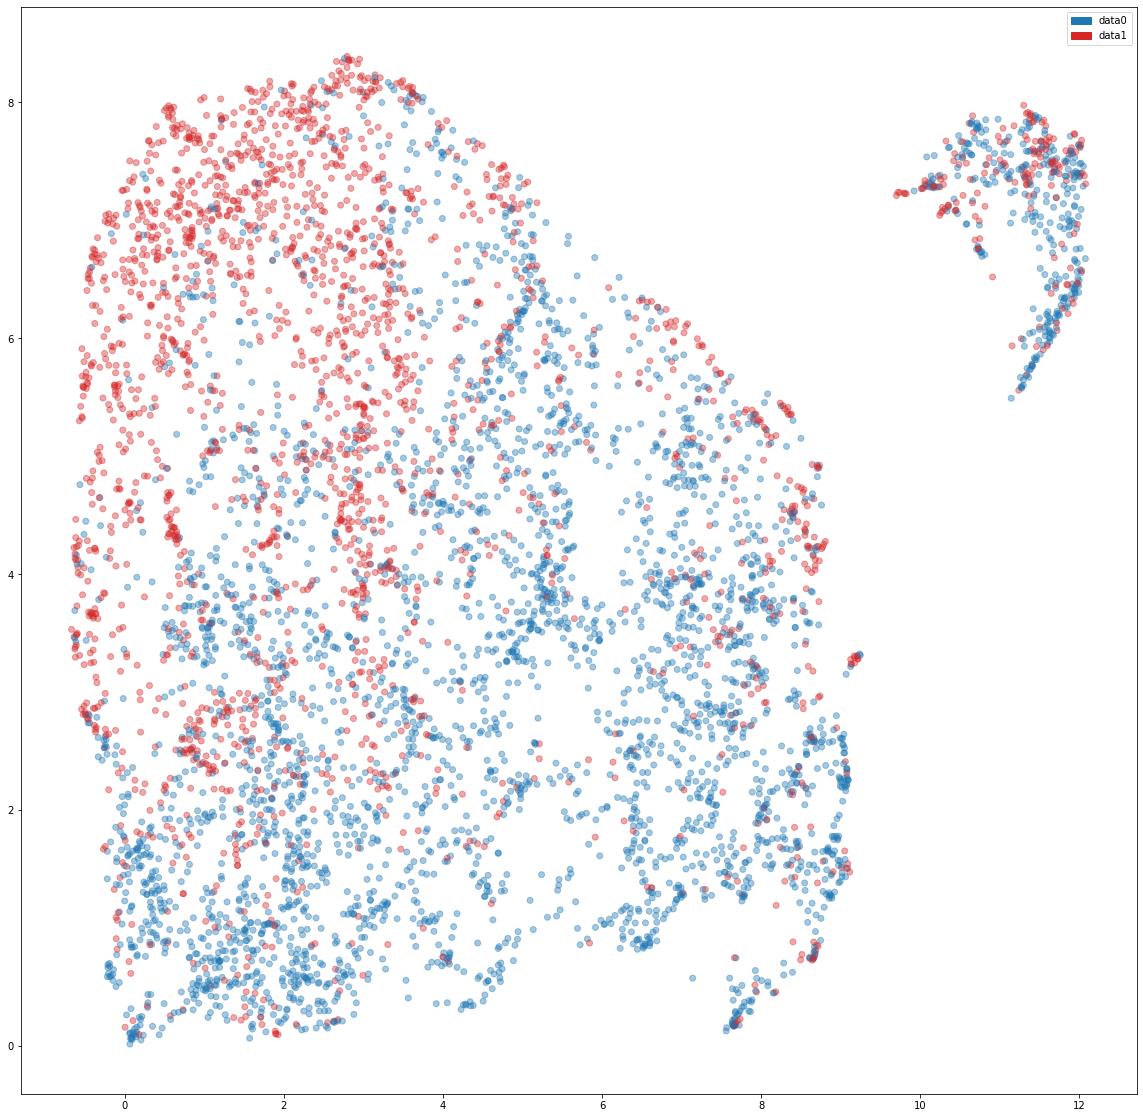

In [612]:
plt.figure(figsize = (20, 20))
for i in range(len(labels_name)):
    locals()['true_label'+str(i)]=mpatches.Patch(color=plt.cm.tab20(i/3), label=labels_name[i])
plt.legend(handles=[eval('true_label'+str(i)) for i in range(len(labels))])
print(len(positive_label))
plt.scatter(umap_2D[:,0], umap_2D[:,1],color=plt.cm.tab20(positive_label_new/3),alpha=0.4)
plt.savefig(output_path+'/'+'mix'+"%_umap_label_bert.png",bbox_inches='tight', pad_inches=0.01)

[[0.47079183742806785, 0.5292081625719322], [0.5699420725166273, 0.4300579274833727]]
55 141279 9322


NameError: name 'file_name' is not defined

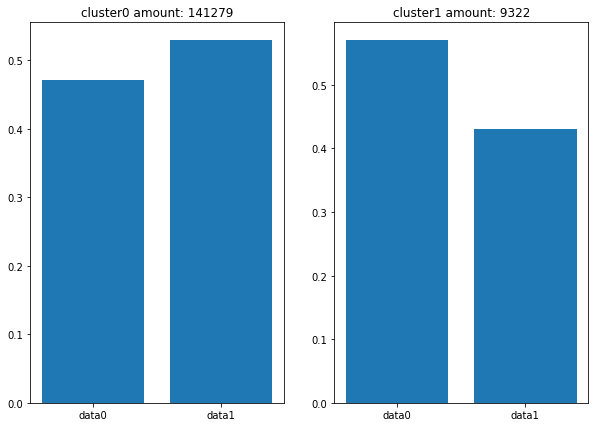

In [559]:
distribution_hist_all=[]
for i in range(filament_cluster_number):
    distribution_hist=[]
    lst=locals()['clusterID'+str(i)]
    for j in range(len(labels)):
        group_percentage=lst.count(labels[j])/len(lst)
        distribution_hist.append(group_percentage)
    distribution_hist_all.append(distribution_hist)
print(distribution_hist_all)
print(len(data),len(cluster0),len(cluster1))

fig, ax = plt.subplots(1,filament_cluster_number,figsize = (5*filament_cluster_number,7))

for i in range(filament_cluster_number):
    ax[i].bar(range(len(labels)),distribution_hist_all[i],tick_label =labels_name)
    particle_number=len(locals()['cluster'+str(i)])
    ax[i].set_title('cluster{} amount: {}'.format(i,particle_number))
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+'distr_new_bert.png')
print('a')

In [ ]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    data_cluster=locals()[cluster_name]
    if datatype==0:
        output=EMdata.output_star(output_path+'/bert_'+file_name,i,data_cluster,metadata)
        output.opticgroup(optics)
        output.writecluster()
    elif datatype==1:
        output=EMdata.output_star(output_path+'/'+file_name,i,data_cluster,metadata)
        output.writemetadata()
        output.writecluster()